In [4]:
import pandas as pd
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns 


In [5]:
treasury = yf.download("^TNX", start = "2013-08-19", end = "2023-08-17" )
silver = pd.read_csv('/Users/aidanolson/Desktop/gold and silver project/silver prices.csv')

treasury = treasury.reset_index()

[*********************100%%**********************]  1 of 1 completed


In [6]:
silver.info() #Need to fix NA values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2539 non-null   object 
 1   Close/Last  2539 non-null   float64
 2   Volume      2476 non-null   float64
 3   Open        2539 non-null   float64
 4   High        2539 non-null   float64
 5   Low         2539 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.1+ KB


In [7]:
silver_null = silver.isnull().sum()
print(silver_null)

Date           0
Close/Last     0
Volume        63
Open           0
High           0
Low            0
dtype: int64


There are 63 null volumes, so we can replace these with the average of the non null volumes to ensure that these values don't mess with the aggregations of our data.

In [62]:
silver['Date'] = pd.to_datetime(silver['Date'])
silver['Year'] = silver['Date'].dt.year
treasury['Date'] = pd.to_datetime(treasury['Date'])
treasury['Year'] = treasury['Date'].dt.year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2539 non-null   datetime64[ns]
 1   Close/Last    2539 non-null   float64       
 2   Volume        2539 non-null   float64       
 3   Open          2539 non-null   float64       
 4   High          2539 non-null   float64       
 5   Low           2539 non-null   float64       
 6   Year          2539 non-null   int32         
 7   Daily Return  2539 non-null   float64       
 8   Average       2539 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int32(1)
memory usage: 168.7 KB


In [9]:
silver_volume_mean = silver.groupby('Year')['Volume'].mean()
silver_volume_mean

Year
2013    34946.614458
2014    40468.616935
2015    39194.807692
2016    54560.357143
2017    70795.003984
2018    70378.805556
2019    60724.437247
2020    70472.349398
2021    60169.353175
2022    50334.490040
2023    57467.439490
Name: Volume, dtype: float64

In [12]:
for year, mean_value in silver_volume_mean.items():
    silver.loc[(silver['Year'] == year) & (silver['Volume'].isna()), 'Volume'] = mean_value

silver.isna().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
Year          0
dtype: int64

In [26]:
#Adding an extra column and some useful data
silver['Average'] = silver[['Open', 'High', 'Low', 'Close/Last']].mean(axis=1)
silver['Price Difference'] = silver['High'] - df['Low']
silver_average_price_all_time = silver['Average'].mean() #Useful aggregate data
silver_average_volume_all_time = silver['Volume'].mean()
silver.head()

,Date,Close/Last,Volume,Open,High,Low,Year,Daily Return,Average
0,2023-08-17,23.042,11441.0,22.800,23.385,22.725,2023,0.000000,22.98800
1,2023-08-16,22.856,10802.0,22.905,23.170,22.770,2023,-0.008072,22.92525
2,2023-08-15,22.656,60396.0,22.650,22.770,22.265,2023,-0.008750,22.58525
3,2023-08-14,22.708,51908.0,22.740,22.820,22.410,2023,0.002295,22.66950
4,2023-08-11,22.743,48043.0,22.760,22.910,22.610,2023,0.001541,22.75575


We have now fixed our missing values and some extra data that should be useful. Now, we can collect some basic statistics on this data.

In [16]:
silver.describe() #Summary stats for data

,Date,Close/Last,Volume,Open,High,Low,Year
count,2539,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000
mean,2018-08-05 18:02:07.609295104,19.132079,56473.916902,19.142883,19.360299,18.905609,2018.092950
min,2013-08-19 00:00:00,11.772000,1.000000,11.975000,12.330000,11.640000,2013.000000
25%,2016-01-26 12:00:00,16.265000,38075.500000,16.257500,16.427500,16.107500,2016.000000
50%,2018-08-02 00:00:00,17.815000,52976.000000,17.850000,18.010000,17.665000,2018.000000
75%,2021-02-08 12:00:00,22.104500,70810.500000,22.195000,22.475000,21.847500,2021.000000
max,2023-08-17 00:00:00,29.418000,347002.000000,29.235000,30.350000,28.300000,2023.000000
std,NaN,3.750198,31441.874202,3.762177,3.826964,3.672283,2.921353


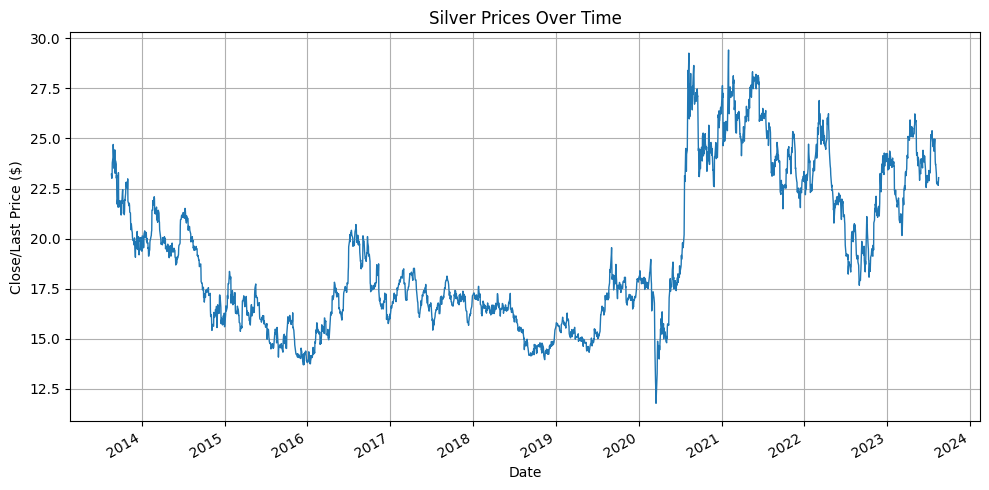

In [56]:
#Start plotting
plt.figure(figsize=(10, 5))

#Create line plot
plt.plot(silver['Date'], silver['Close/Last'], linewidth=1)  

#Adding the title and labels
plt.title('Silver Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close/Last Price ($)')

plt.gcf().autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
silver['Daily Return'] = silver['Close/Last'].pct_change().fillna(0)
treasury['Daily Return'] = treasury['Close'].pct_change().fillna(0)

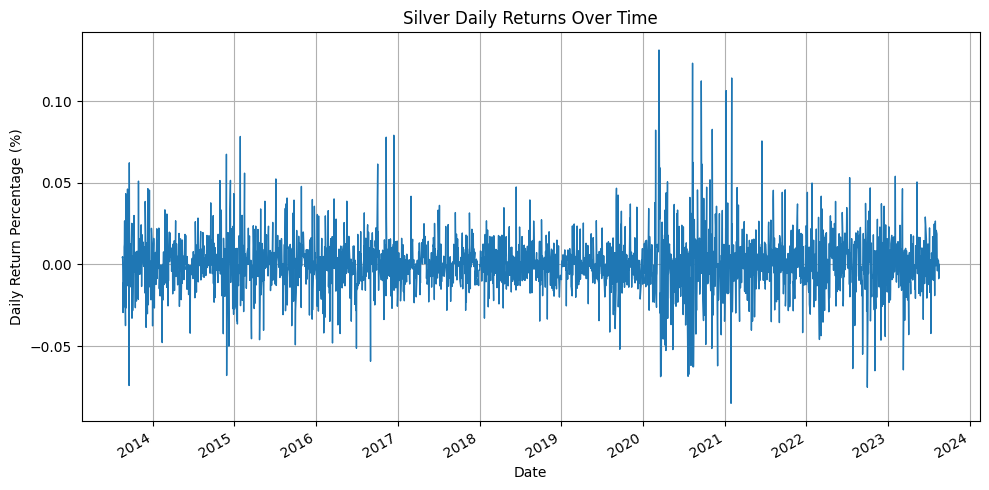

In [61]:
#Start plotting
plt.figure(figsize=(10, 5))

#Create line plot
plt.plot(silver['Date'], silver['Daily Return'], linewidth=1)  

#Adding the title and labels
plt.title('Silver Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage (%)')

plt.gcf().autofmt_xdate()
plt.grid(True)
plt.tight_layout()

plt.show()

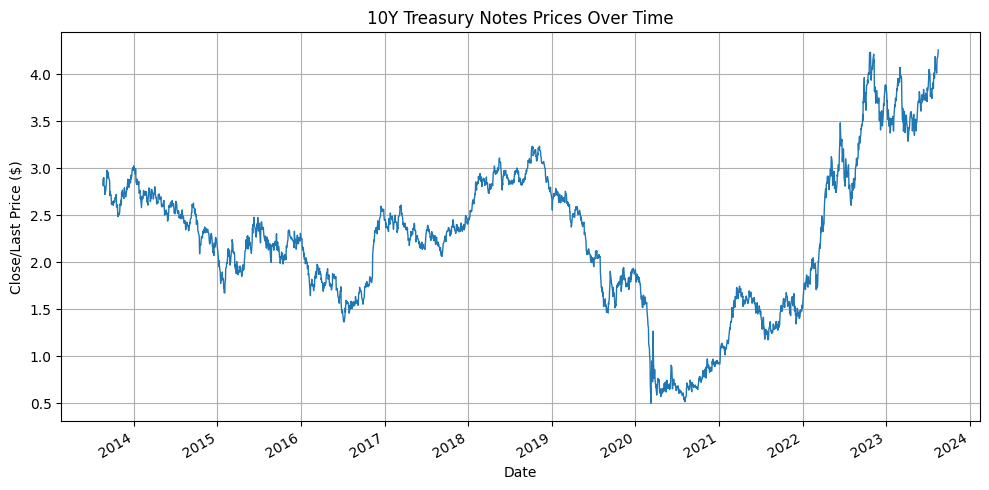

In [59]:
#Start plotting
plt.figure(figsize=(10, 5))

#Create line plot
plt.plot(treasury['Date'], treasury['Close'], linewidth=1)  

#Adding the title and labels
plt.title('10Y Treasury Notes Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close/Last Price ($)')

plt.gcf().autofmt_xdate()
plt.grid(True)
plt.tight_layout()

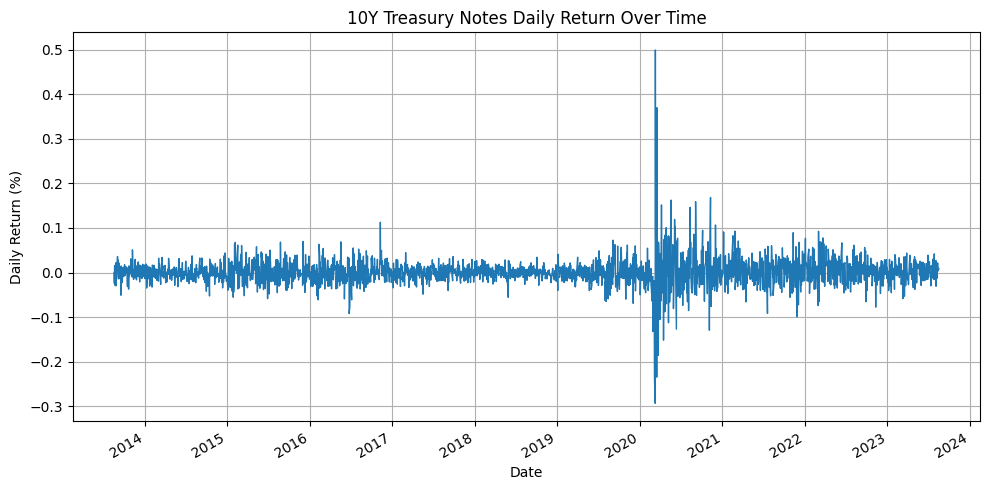

In [60]:
#Start plotting
plt.figure(figsize=(10, 5))

#Create line plot
plt.plot(treasury['Date'], treasury['Daily Return'], linewidth=1)  

#Adding the title and labels
plt.title('10Y Treasury Notes Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.gcf().autofmt_xdate()
plt.grid(True)
plt.tight_layout()